In [4]:
import os
os.chdir("/home/valentin/Desktop/TagThePicture/presentation_jan_2026/TagThePicture_data/")

from main import get_annotations, get_thesaurus

import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
anns = get_annotations()

# Annotators

number of times a number of annotations per annotator occurs  
(_more than 100 annotators have exactly 1 annotation, etc_)

In [ ]:
anns.AnnotatorUuid.value_counts().hist()
plt.grid(False)


### timeline of annotator activity

number of annotations per month

In [ ]:
import matplotlib.pyplot as plt
anns.datetime.apply(lambda d: f"{d.month}-{d.year}").hist(bins=14)
plt.grid(False)
_=plt.xticks(rotation=70)

### Annotator behaviour

In [ ]:
def to_dist(cs):
    return cs/cs.sum()

# top_ten = set(anns.termIdentifier.value_counts()[:10].index)


# def top_ten_overlap(anno_id):
#     x = anns[anns.AnnotatorUuid == anno_id].termIdentifier.value_counts()[:10].index
#     return len(set(x) & top_ten)

# import pandas as pd
# anno_counts = anns.AnnotatorUuid.value_counts()[:10].index
# to_dist(pd.Series(anno_counts).apply(top_ten_overlap).value_counts()).round(2).sort_index()
global_top_ten = to_dist(anns.label.value_counts())[:20]
plt.plot(global_top_ten.values, "x-")


plt.xticks(ticks=list(range(20)), labels=list(global_top_ten.index))
plt.xticks(rotation=90)

anno_counts = anns.AnnotatorUuid.value_counts()[:10]
for ann_ID, anno_c in zip(anno_counts.index, anno_counts):
    # l = anns[anns.AnnotatorUuid == a]
    cur_term_counts = anns[anns.AnnotatorUuid == ann_ID].label.value_counts()
    plt.plot(to_dist(cur_term_counts).loc[global_top_ten.index].values, ".")

# Annotations

In [9]:
anns_thes = get_thesaurus(sorted(anns.termIdentifier.unique()))
english = anns_thes[anns_thes.altLabelLanguage == "en"]

querying for thesaurus: 100%|██████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.36it/s]


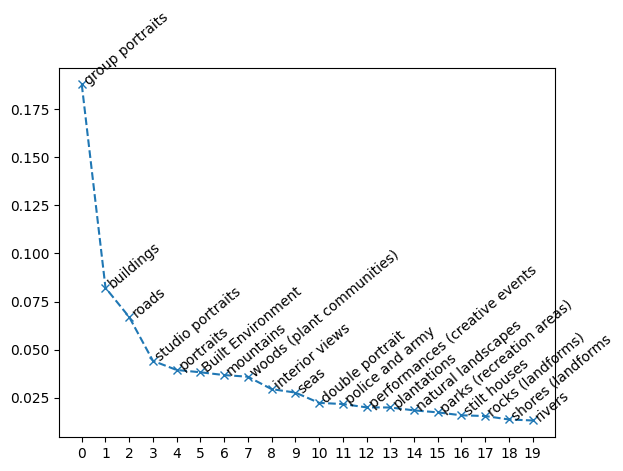

In [28]:
label_counts = anns.merge(english, left_on="termIdentifier", right_index=True, how="left").altLabel.value_counts()
label_counts = label_counts/label_counts.sum()
sub_counts = label_counts.iloc[:20]

plt.plot(sub_counts, "x--")
for i, (l, c) in enumerate(sub_counts.items()):
    plt.annotate(l, (i, c), rotation=40)
_=plt.xticks(range(20), range(20))

In [34]:
label_counts = anns.merge(english, left_on="termIdentifier", right_index=True, how="left").altLabel.value_counts()
label_counts[label_counts < 100]

label_counts.iloc[-10:]

altLabel
mines (industrial complexes)    109
military installations           98
mosques                          69
house and plant fires            61
traffic accidents                61
volcano eruptions                60
floods (natural events)          54
soccer fields                    20
caves                            20
tennis courts                    11
Name: count, dtype: int64

In [43]:
num_objs = len(anns.objectIdentifier.unique())
anns.groupby("objectIdentifier").apply(lambda sub: len(sub.termIdentifier.unique())).value_counts().sort_index()/num_objs

/tmp/ipykernel_39731/2618605059.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anns.groupby("objectIdentifier").apply(lambda sub: len(sub.termIdentifier.unique())).value_counts().sort_index()/num_objs


1    0.256519
2    0.399583
3    0.239587
4    0.084661
5    0.017476
6    0.001992
7    0.000181
Name: count, dtype: float64

In [56]:
from collections import defaultdict
cooc = defaultdict(int)

def gather(sub):
    terms = sub.altLabel.unique()
    if len(terms) > 1:
        for t1 in terms:
            for t2 in terms:
                if not t1 == t2:
                # e1, e2 = english.loc[t1].altLabel, english.loc[t2].altLabel
                    cooc[(t1, t2)] +=1
    

anns.merge(english, left_on="termIdentifier", right_index=True, how="left"
          ).groupby("objectIdentifier").apply(gather)

/tmp/ipykernel_39731/418427959.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).groupby("objectIdentifier").apply(gather)


""


In [60]:
len(sorted(cooc.items(), key = lambda tup:tup[1], reverse=True))/2

1313.5

In [64]:
1313/anns.termIdentifier.unique().shape[0]**2

0.2532793209876543

In [66]:
412/anns.objectIdentifier.unique().shape[0]

0.0373053241579138